In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, auc
import seaborn as sns
import joblib
import time
data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data:")
print(X_train)
print("Testing Data:")
print(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
dt_model = DecisionTreeClassifier(max_depth=10)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Model Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
svm_model = SVC(kernel='linear', max_iter=500)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Model Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Comparison of Models:")
print(f"Decision Tree Accuracy: {dt_accuracy}, SVM Accuracy: {svm_accuracy}")

Training Data:
[[1.434e+01 1.680e+00 2.700e+00 ... 5.700e-01 1.960e+00 6.600e+02]
 [1.253e+01 5.510e+00 2.640e+00 ... 8.200e-01 1.690e+00 5.150e+02]
 [1.237e+01 1.070e+00 2.100e+00 ... 1.040e+00 2.770e+00 6.600e+02]
 ...
 [1.438e+01 1.870e+00 2.380e+00 ... 1.200e+00 3.000e+00 1.547e+03]
 [1.269e+01 1.530e+00 2.260e+00 ... 9.600e-01 2.060e+00 4.950e+02]
 [1.234e+01 2.450e+00 2.460e+00 ... 8.000e-01 3.380e+00 4.380e+02]]
Testing Data:
[[1.364000e+01 3.100000e+00 2.560000e+00 1.520000e+01 1.160000e+02
  2.700000e+00 3.030000e+00 1.700000e-01 1.660000e+00 5.100000e+00
  9.600000e-01 3.360000e+00 8.450000e+02]
 [1.421000e+01 4.040000e+00 2.440000e+00 1.890000e+01 1.110000e+02
  2.850000e+00 2.650000e+00 3.000000e-01 1.250000e+00 5.240000e+00
  8.700000e-01 3.330000e+00 1.080000e+03]
 [1.293000e+01 2.810000e+00 2.700000e+00 2.100000e+01 9.600000e+01
  1.540000e+00 5.000000e-01 5.300000e-01 7.500000e-01 4.600000e+00
  7.700000e-01 2.310000e+00 6.000000e+02]
 [1.373000e+01 1.500000e+00 2.70000

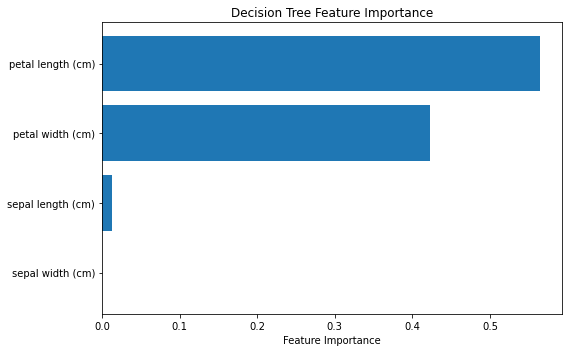

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'],
         feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

